In [181]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy import random as ran
from scipy.special import gamma, factorial

%matplotlib inline

In [182]:
N = 11
values = [8, 11, 25, 43, 44, 73, 42, 27, 19, 5, 3]
dati = []

tot = 0
for i in range(0, N):
    tot = tot  + values[i]

for i in range(0, N):
    for j in range(0, values[i]):
        dati.append(i)       

mean = 0
for i in range(0, tot):
    mean = mean + dati[i]

mean = mean/tot

sqean = 0
for i in range(0, tot):
    sqean = sqean + dati[i]**2
    
sqean = sqean/tot

var = sqean - mean**2
sigma = var**.5

In [183]:
def Choose(n, k):
    return factorial(n)/(factorial(k) * factorial(n-k))

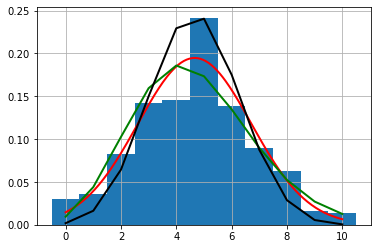

In [184]:
dati.append(10.5)
dati.append(-0.5)
count, bins, ignored = plt.hist(dati, 11, density = True)
xvals = np.linspace(0, 10, 200)
point = np.linspace(0, 10, 11)
plt.plot(xvals, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (xvals - mean)**2 / (2 * sigma**2) ),
                linewidth=2, color='r') #in rosso la gaussiana
plt.plot(point, mean**point / factorial(point) * np.exp(- mean), linewidth = 2, color = 'g') #in verde Poisson
plt.plot(point, Choose(10, point) * ((mean/10) ** (point)) * ((1 - mean/10) ** (10 - point)), 
        linewidth = 2, color='k') #in nero distribuzione binomiale
plt.grid()

In [185]:
#chi quadro gaussiana
G = 0
for i in range(0, N):
    G = (G + (values[i]/tot - 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mean)**2 / (2 * sigma**2))**2)**2/
    (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mean)**2 / (2 * sigma**2))))

print("Il valore del chi quadro per la gaussiana è", G)

#chi quadro per Poisson
P = 0
for i in range(0, N):
    P = P + (values[i]/tot - mean**i / factorial(i) * np.exp(- mean))**2 / (mean**i / factorial(i) * np.exp(- mean))
    
print("Il valore del chi quadro per Poisson è", P)

#chi quadro per la distribuzione binomiale
B = 0
for i in range(0, N):
    B = (B + (values[i]/tot - Choose(10, i) * ((mean/10) ** (i)) * ((1 - mean/10) ** (10 - i)))**2 
          / (Choose(10, i) * ((mean/10) ** (i)) * ((1 - mean/10) ** (10 - i))))

print("Il valore del chi quadro per la distribuzione binomiale è", B)

Il valore del chi quadro per la gaussiana è 0.21192392139523056
Il valore del chi quadro per Poisson è 0.08152977217816978
Il valore del chi quadro per la distribuzione binomiale è 0.6462766148217908
